In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('diabetes_data_upload.csv')

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [4]:
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# Descriptive statistics of data

df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [6]:
# check the type of data and see if there is any missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
# find the total number of missing values for each variable

df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


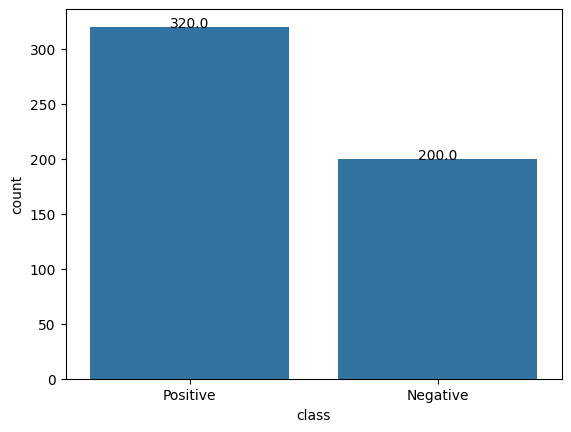

In [8]:
# Is the dataset balanced?

# Create the countplot
ax = sns.countplot(data=df, x='class')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

# Display the plot
plt.show()

In [9]:
# Number of people with diabetes
(df[['class']]=="Positive").sum()

,0
class,320


In [10]:
# Number of people without diabetes

(df[['class']]=="Negative").sum()

,0
class,200


In [11]:
# calculate probability of having diabetes

(df[['class']]=="Positive").sum() / len(df['class'])

,0
class,0.615385


In [12]:
# list of all columns in my dataset

columns_list=df.columns.tolist()

In [13]:
columns_list

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [20]:
# List of categorical variables (dtype == object or category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# List of numerical variables (dtype == int or float)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Display the lists
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']
Numerical columns: ['Age']


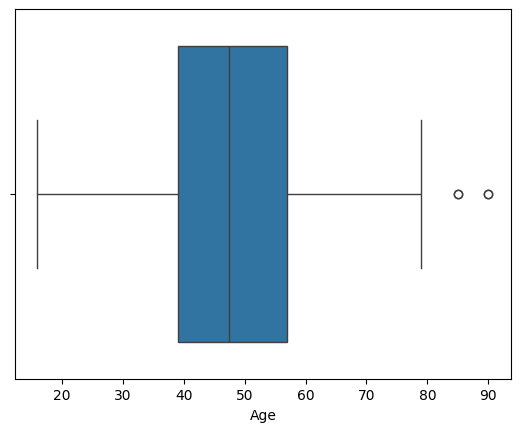

In [21]:
# Create a boxplot for the 'age' column to detect outliers
sns.boxplot(data=df, x='Age');

In [22]:
# Calculate the IQR for the 'age' column
Q1 = df['Age'].quantile(0.25)  # 25th percentile
Q3 = df['Age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df1 = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

print("Cleaned DataFrame (Without Age Outliers):")
print(df1)

Cleaned DataFrame (Without Age Outliers):
     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genit

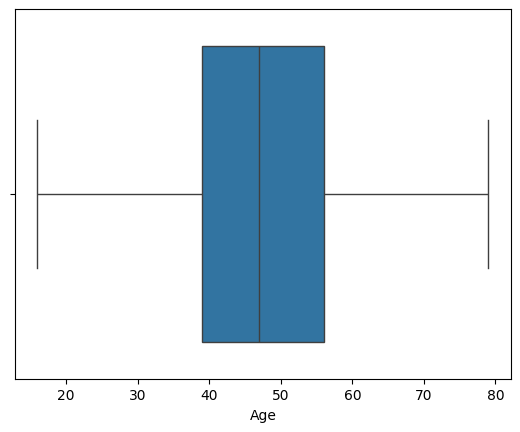

In [23]:
sns.boxplot(data=df1, x='Age');

In [26]:
# label Encoding

from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

for col in categorical_cols:
    df1.loc[:,col]=lb.fit_transform(df1[col])

In [27]:
df1.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [28]:
# Standardize the numerical variable (Age variable)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1.loc[:,numerical_cols] = scaler.fit_transform(df1[numerical_cols])

<ipython-input-28-7b10de898769>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.38095238 0.66666667 0.3968254  0.46031746 0.6984127  0.61904762
 0.65079365 0.79365079 0.80952381 0.85714286 0.44444444 0.34920635
 0.3015873  0.71428571 0.6984127  0.66666667 0.6031746  0.80952381
 0.79365079 0.42857143 0.73015873 0.6031746  0.36507937 0.50793651
 0.66666667 0.25396825 0.41269841 0.57142857 0.34920635 0.58730159
 0.65079365 0.3968254  0.33333333 0.6031746  0.52380952 0.50793651
 0.6984127  0.74603175 0.3015873  0.22222222 0.58730159 0.53968254
 0.53968254 0.3015873  0.38095238 0.50793651 0.6984127  0.6984127
 0.3015873  0.47619048 0.31746032 0.53968254 0.6984127  0.53968254
 0.55555556 0.34920635 0.79365079 0.58730159 0.68253968 0.36507937
 0.77777778 0.3015873  0.61904762 0.6984127  0.46031746 0.38095238
 0.22222222 0.3015873  0.14285714 0.53968254 0.38095238 0.3015873
 0.77777778 0.34920635 0.53968254 0.61904762 

In [29]:
df1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.380952,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.666667,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.396825,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.460317,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.698413,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.365079,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0.507937,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.666667,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0.253968,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [30]:
X= df1.drop(columns=['class'])
y = df1['class'].astype(str)

In [31]:
# SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X,y)

In [32]:
y_res

,class
0,1
1,1
2,1
3,1
4,1
...,...
627,0
628,0
629,0
630,0


In [34]:
y_res.value_counts()

,count
class,
1,316
0,316


In [35]:
# split into training and testing test

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=8)

In [36]:
# Naive Bayes Model

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [37]:
# Decision Tree Model

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [38]:
# Random Forest Model

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

In [39]:
# KNN model

knn_model =KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [40]:
# Evaluation: Confusion Matrix and Metrics

def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label='1'):.2f}")  # Specify pos_label as '1'
    print(f"PRecall:   {recall_score(y_test, y_pred, pos_label='1'):.2f}")  # Specify pos_label as '1'
    print(f"F1 Score:  {f1_score(y_test, y_pred, pos_label='1'):.2f}\n")  # Specify pos_label as '1'

In [41]:
# Evaluate all models

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "KNN")

Model: Naive Bayes
Confusion Matrix:
[[83 17]
 [ 9 81]]
Accuracy:  0.86
Precision: 0.83
PRecall:   0.90
F1 Score:  0.86

Model: Decision Tree
Confusion Matrix:
[[95  5]
 [ 4 86]]
Accuracy:  0.95
Precision: 0.95
PRecall:   0.96
F1 Score:  0.95

Model: Random Forest
Confusion Matrix:
[[96  4]
 [ 0 90]]
Accuracy:  0.98
Precision: 0.96
PRecall:   1.00
F1 Score:  0.98

Model: KNN
Confusion Matrix:
[[99  1]
 [10 80]]
Accuracy:  0.94
Precision: 0.99
PRecall:   0.89
F1 Score:  0.94



In [42]:
# plot confusion matrix using seaborn library

cm1=confusion_matrix(y_test, y_pred_nb)
cm2=confusion_matrix(y_test, y_pred_dt)
cm3=confusion_matrix(y_test, y_pred_rf)
cm4=confusion_matrix(y_test, y_pred_knn)

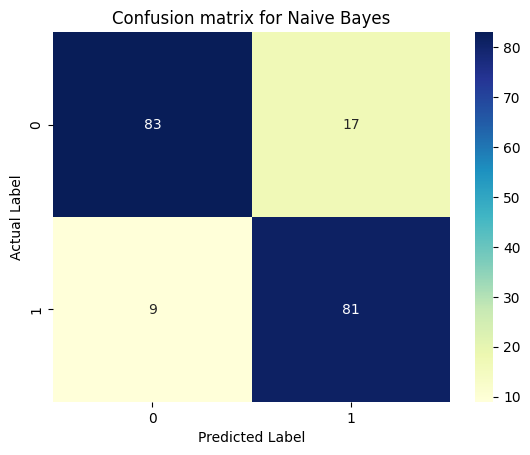

In [43]:
# confusion matrix for Naive Bayes

sns.heatmap(cm1, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Naive Bayes');

In [44]:
print ("Accuracy of Naive Bayes for training datatse is:", nb_model.score(X_train, y_train))

Accuracy of Naive Bayes for training datatse is: 0.8914027149321267


In [45]:
print ("Accuracy of Naive Bayes for training datatse is:", nb_model.score(X_test, y_test))

Accuracy of Naive Bayes for training datatse is: 0.8631578947368421


In [ ]:
# No the accuracy for both training and testing are similar, so there is overfitting in this case.
# we do not observe underfitting, because the accuracy of training is almost 90%, which is good, of course not perfect.

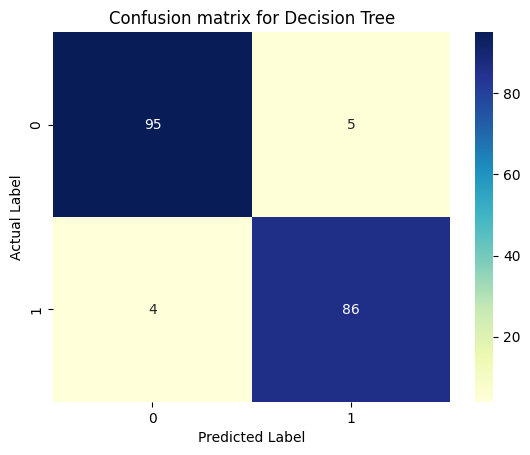

In [46]:
# confusion matrix for Decision Tree

sns.heatmap(cm2, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Decision Tree');

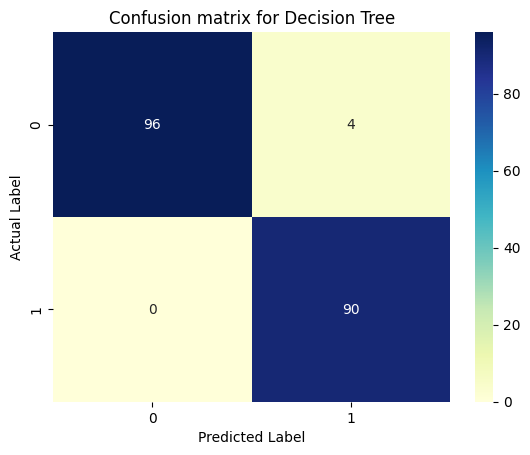

In [47]:
# confusion matrix for Random Forest

sns.heatmap(cm3, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Decision Tree');

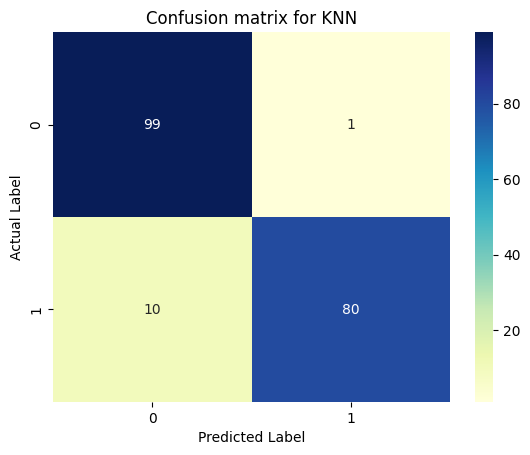

In [48]:
# confusion matrix for KNN

sns.heatmap(cm4, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for KNN');

In [49]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.96      1.00      0.98        90

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190



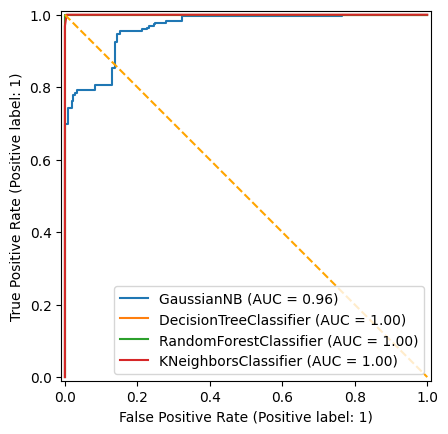

In [50]:
# plot ROC curve for Xtrain and Xtest

from sklearn.metrics import RocCurveDisplay

disp =RocCurveDisplay.from_estimator(nb_model, X_train, y_train)
RocCurveDisplay.from_estimator(dt_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_train, y_train, ax=disp.ax_)
plt.plot([0,1], [1,0], color='orange', linestyle='--');

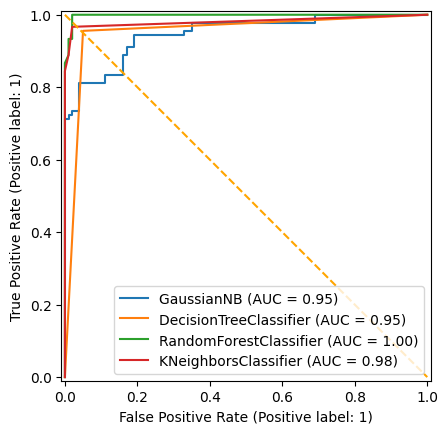

In [51]:
# ROC Curve for Testing dataset

disp =RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_test, y_test, ax=disp.ax_)
plt.plot([0,1], [1,0], color='orange', linestyle='--');

In [52]:
# load new observations (new patients)
from google.colab import files

uploaded = files.upload()

new_data = pd.read_excel('new_data_1.xlsx')

Saving new_data_1.xlsx to new_data_1 (1).xlsx


In [53]:
new_data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,32,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,22,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1
2,21,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1


In [54]:
# Standardize the numerical variable (Age) in new data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_data.loc[:, numerical_cols] = scaler.fit_transform(new_data[numerical_cols])

# Now predict using the preprocessed new data
y_pred_new_observation = rf_model.predict(new_data)

<ipython-input-54-d1fddd602da5>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.         0.09090909 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[:, numerical_cols] = scaler.fit_transform(new_data[numerical_cols])


In [55]:
y_pred_new_observation

array(['1', '1', '0'], dtype=object)

In [56]:
# Find the importance of features ----- Features importance using Random Forest

rf=RandomForestClassifier(random_state=1, n_estimators=100)

In [57]:
rf.fit(X,y)

RandomForestClassifier(random_state=1)

In [58]:
I = rf.feature_importances_

In [59]:
I

array([0.09979089, 0.10074774, 0.23667893, 0.17409742, 0.05463703,
       0.01899721, 0.03482046, 0.02016767, 0.02595799, 0.02949785,
       0.03967113, 0.02982478, 0.04930947, 0.02473757, 0.04078092,
       0.02028294])

In [60]:
df1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [70]:
# Define a variable that contains only the feature column names

name_features = df1.drop(columns=['class']).columns.tolist()


In [71]:
name_features

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [72]:
len(name_features)

16

In [73]:
len(I)

16

In [74]:
# generate a new dataframe call it df_I

df_I = pd.DataFrame({'Feature': name_features, 'Importance': I})

In [ ]:
df_I

,Feature,Importance
0,Age,0.099791
1,Gender,0.100748
2,Polyuria,0.236679
3,Polydipsia,0.174097
4,sudden weight loss,0.054637
5,weakness,0.018997
6,Polyphagia,0.034820
7,Genital thrush,0.020168
8,visual blurring,0.025958
9,Itching,0.029498


<Axes: xlabel='Importance', ylabel='Feature'>

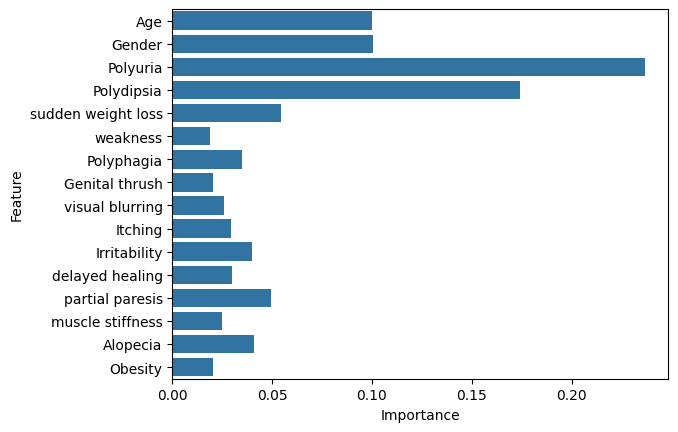

In [75]:
# plot the feature importance

sns.barplot(data=df_I, x='Importance', y='Feature')

In [76]:
# find the best value of K in KNN

from sklearn.metrics import balanced_accuracy_score

In [77]:
error=[]

#calculating the error for k values between 1 and 39

for i in range(1,21):  # i=1,2,...,20
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy = balanced_accuracy_score(y_test, pred_i)
    error.append(1-accuracy)

error;

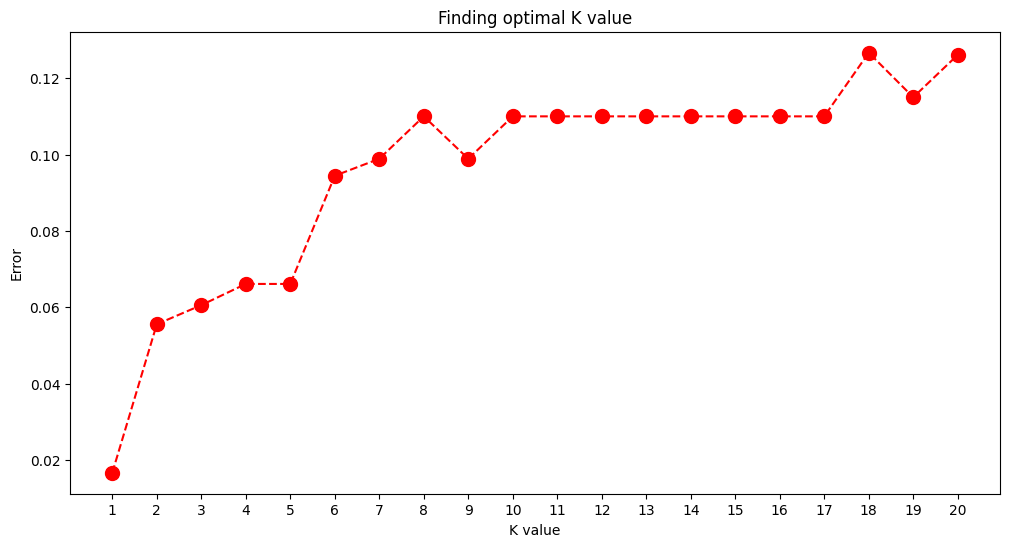

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(range(1,21), error, color='red',   linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title ('Finding optimal K value')
plt.xlabel ('K value')
plt.ylabel('Error');

plt.xticks(ticks=range(1, 21));

In [ ]:
######################   Conditional Probability #################
#### 1 = Positive/Yes ### 0 = Negative/No ###

In [ ]:
# P(Class = 1 | Polyuria = 1)
polyuria = (df1['Polyuria']==1).sum()
poly_dia = ((df1['Polyuria']==1) & (df1['class']==1) ).sum()
poly_dia / polyuria

0.94140625

In [ ]:
# P(Class = 1 | Polydipsia = 1)
polydip = (df1['Polydipsia']==1).sum()
poly_dip = ((df1['Polydipsia']==1) & (df1['class']==1) ).sum()
poly_dip / polydip

0.9650655021834061

In [ ]:
# P(Class = 1 | Partial Paresis = 1)
paresis = (df1['partial paresis']==1).sum()
paresis_dia = ((df1['partial paresis']==1) & (df1['class']==1) ).sum()
paresis_dia / paresis

0.8558558558558559

In [ ]:
# P(Class = 1 | Sudden Weight Loss = 1)
weight = (df1['sudden weight loss']==1).sum()
weight_dia = ((df1['sudden weight loss']==1) & (df1['class']==1) ).sum()
weight_dia / weight

0.863849765258216